In [1]:
#path
import os
from os.path import isdir, join
from pathlib import Path

# Scientific Math 
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
from sklearn.model_selection import train_test_split
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import tensorflow as tf
import plotly.offline as py
import plotly.graph_objs as go

#Deep learning
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import Input, layers
from tensorflow.keras import backend as K
import tensorflow as tf

import random
import copy
import librosa


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [2]:
pwd

'C:\\Users\\Michal\\Desktop\\semestr2\\MGU\\speech-master'

## Load data from scratch

In [ ]:
dirs = [r'C:\Users\Michal\Desktop\semestr2\MGU\project3\data\test\test\audio']

all_wavs = []
all_names = []
for direct in dirs:
    waves = [f for f in os.listdir(direct) if f.endswith('.wav')]
    
    for i, wav in enumerate(waves):
        if i%100 == 0:
            print(i/len(waves))
        samples, sample_rate = librosa.load(join(join(direct), wav), sr = 16000)
        samples = librosa.resample(samples, sample_rate, 16000)
        all_wavs.append(samples)  
        all_names.append(wav)

split wav, label

In [4]:
print(len(all_wavs))

158538


In [5]:
np.save("./data/test/all_wavs_16000.npy", np.asarray(all_wavs))
np.save("./data/test/all_wavs_16000_names.npy", np.asarray(all_names))

In [6]:
np.asarray(all_wavs).shape

(158538, 16000)

## Load data fast

In [3]:
wavs = np.load(r"./data/test/all_wavs_16000.npy", allow_pickle=True)
wavs_names = np.load(r"./data/test/all_wavs_16000_names.npy", allow_pickle=True)

In [4]:
wavs = np.asarray(wavs)
wavs.shape

(158538, 16000)

## Load model

In [18]:
# model = tf.keras.models.load_model('../models/rec/model-098-0.842355.h5')
model = tf.keras.models.load_model(r'C:\Users\Michal\Desktop\semestr2\MGU\speech-master\models\ensemble_best.h5')

In [6]:
wavs = np.expand_dims(wavs, axis=2)
wavs.shape

(158538, 16000, 1)

### Create mels

In [7]:
def make_spec(audio, flip = False, ps = False, st = 4):
    """
    create a melspectrogram from the amplitude of the sound
    
    Args:
        file (str): filename
        file_dir (str): directory path
        flip (bool): reverse time axis
        ps (bool): pitch shift
        st (int): half-note steps for pitch shift
    Returns:
        np.array with shape (122,85) (time, freq)
    """
    sig, rate = audio, 16000
    if len(sig) < 16000: # pad shorter than 1 sec audio with ramp to zero
        sig = np.pad(sig, (0,16000-len(sig)), 'linear_ramp')
    if ps:
        sig = librosa.effects.pitch_shift(sig, rate, st)
    D = librosa.amplitude_to_db(librosa.stft(sig[:16000], n_fft = 512, 
                                             hop_length = 128, 
                                             center = False), ref = np.max)
    S = librosa.feature.melspectrogram(S=D, n_mels = 85).T
    if flip:
        S = np.flipud(S)
    return S.astype(np.float32)

C:\Users\Michal\Anaconda\envs\jlab\lib\site-packages\librosa\core\spectrum.py:1702: UserWarning:

amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.



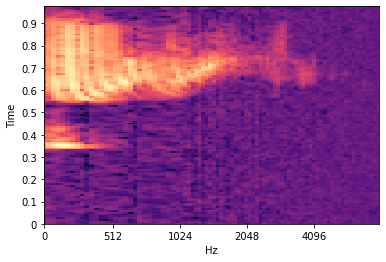

In [8]:
import librosa.display

librosa.display.specshow(make_spec(np.squeeze(wavs[11]), flip = False, ps = False, st = 4), 
                         x_axis='mel', 
                         fmax=8000, 
                         y_axis='time', 
                         sr = 16000,
                         hop_length = 128)

In [19]:
batch_size = 512
n_steps = wavs.shape[0]//batch_size
n_steps
preds_all = []
sample_rate = 8000
for i in range(n_steps+1):
    print(i)
    if i==n_steps:
        spectograms_test = [make_spec(np.squeeze(elem))\
                         for elem in wavs[i*batch_size:]]
    else:
        spectograms_test = [make_spec(np.squeeze(elem))\
                         for elem in wavs[i*batch_size:i*batch_size + batch_size]]
    spectograms_test = np.asarray(spectograms_test)
    spectograms_test = np.expand_dims(spectograms_test, axis=3)
    spectograms_test.shape
    spectograms_test = spectograms_test + 1.3
    preds_all.append(model.predict(spectograms_test, batch_size=batch_size))
predictions = np.array([item for sublist in preds_all for item in sublist])

309

0


C:\Users\Michal\Anaconda\envs\jlab\lib\site-packages\librosa\core\spectrum.py:1702: UserWarning:

amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.



(512, 122, 85, 1)

1


(512, 122, 85, 1)

2


(512, 122, 85, 1)

3


(512, 122, 85, 1)

4


(512, 122, 85, 1)

5


(512, 122, 85, 1)

6


(512, 122, 85, 1)

7


(512, 122, 85, 1)

8


(512, 122, 85, 1)

9


(512, 122, 85, 1)

10


(512, 122, 85, 1)

11


(512, 122, 85, 1)

12


(512, 122, 85, 1)

13


(512, 122, 85, 1)

14


(512, 122, 85, 1)

15


(512, 122, 85, 1)

16


(512, 122, 85, 1)

17


(512, 122, 85, 1)

18


(512, 122, 85, 1)

19


(512, 122, 85, 1)

20


(512, 122, 85, 1)

21


(512, 122, 85, 1)

22


(512, 122, 85, 1)

23


(512, 122, 85, 1)

24


(512, 122, 85, 1)

25


(512, 122, 85, 1)

26


(512, 122, 85, 1)

27


(512, 122, 85, 1)

28


(512, 122, 85, 1)

29


(512, 122, 85, 1)

30


(512, 122, 85, 1)

31


(512, 122, 85, 1)

32


(512, 122, 85, 1)

33


(512, 122, 85, 1)

34


(512, 122, 85, 1)

35


(512, 122, 85, 1)

36


(512, 122, 85, 1)

37


(512, 122, 85, 1)

38


(512, 122, 85, 1)

39


(512, 122, 85, 1)

40


(512, 122, 85, 1)

41


(512, 122, 85, 1)

42


(512, 122, 85, 1)

43


(512, 122, 85, 1)

44


(512, 122, 85, 1)

45


(512, 122, 85, 1)

46


(512, 122, 85, 1)

47


(512, 122, 85, 1)

48


(512, 122, 85, 1)

49


(512, 122, 85, 1)

50


(512, 122, 85, 1)

51


(512, 122, 85, 1)

52


(512, 122, 85, 1)

53


(512, 122, 85, 1)

54


(512, 122, 85, 1)

55


(512, 122, 85, 1)

56


(512, 122, 85, 1)

57


(512, 122, 85, 1)

58


(512, 122, 85, 1)

59


(512, 122, 85, 1)

60


(512, 122, 85, 1)

61


(512, 122, 85, 1)

62


(512, 122, 85, 1)

63


(512, 122, 85, 1)

64


(512, 122, 85, 1)

65


(512, 122, 85, 1)

66


(512, 122, 85, 1)

67


(512, 122, 85, 1)

68


(512, 122, 85, 1)

69


(512, 122, 85, 1)

70


(512, 122, 85, 1)

71


(512, 122, 85, 1)

72


(512, 122, 85, 1)

73


(512, 122, 85, 1)

74


(512, 122, 85, 1)

75


(512, 122, 85, 1)

76


(512, 122, 85, 1)

77


(512, 122, 85, 1)

78


(512, 122, 85, 1)

79


(512, 122, 85, 1)

80


(512, 122, 85, 1)

81


(512, 122, 85, 1)

82


(512, 122, 85, 1)

83


(512, 122, 85, 1)

84


(512, 122, 85, 1)

85


(512, 122, 85, 1)

86


(512, 122, 85, 1)

87


(512, 122, 85, 1)

88


(512, 122, 85, 1)

89


(512, 122, 85, 1)

90


(512, 122, 85, 1)

91


(512, 122, 85, 1)

92


(512, 122, 85, 1)

93


(512, 122, 85, 1)

94


(512, 122, 85, 1)

95


(512, 122, 85, 1)

96


(512, 122, 85, 1)

97


(512, 122, 85, 1)

98


(512, 122, 85, 1)

99


(512, 122, 85, 1)

100


(512, 122, 85, 1)

101


(512, 122, 85, 1)

102


(512, 122, 85, 1)

103


(512, 122, 85, 1)

104


(512, 122, 85, 1)

105


(512, 122, 85, 1)

106


(512, 122, 85, 1)

107


(512, 122, 85, 1)

108


(512, 122, 85, 1)

109


(512, 122, 85, 1)

110


(512, 122, 85, 1)

111


(512, 122, 85, 1)

112


(512, 122, 85, 1)

113


(512, 122, 85, 1)

114


(512, 122, 85, 1)

115


(512, 122, 85, 1)

116


(512, 122, 85, 1)

117


(512, 122, 85, 1)

118


(512, 122, 85, 1)

119


(512, 122, 85, 1)

120


(512, 122, 85, 1)

121


(512, 122, 85, 1)

122


(512, 122, 85, 1)

123


(512, 122, 85, 1)

124


(512, 122, 85, 1)

125


(512, 122, 85, 1)

126


(512, 122, 85, 1)

127


(512, 122, 85, 1)

128


(512, 122, 85, 1)

129


(512, 122, 85, 1)

130


(512, 122, 85, 1)

131


(512, 122, 85, 1)

132


(512, 122, 85, 1)

133


(512, 122, 85, 1)

134


(512, 122, 85, 1)

135


(512, 122, 85, 1)

136


(512, 122, 85, 1)

137


(512, 122, 85, 1)

138


(512, 122, 85, 1)

139


(512, 122, 85, 1)

140


(512, 122, 85, 1)

141


(512, 122, 85, 1)

142


(512, 122, 85, 1)

143


(512, 122, 85, 1)

144


(512, 122, 85, 1)

145


(512, 122, 85, 1)

146


(512, 122, 85, 1)

147


(512, 122, 85, 1)

148


(512, 122, 85, 1)

149


(512, 122, 85, 1)

150


(512, 122, 85, 1)

151


(512, 122, 85, 1)

152


(512, 122, 85, 1)

153


(512, 122, 85, 1)

154


(512, 122, 85, 1)

155


(512, 122, 85, 1)

156


(512, 122, 85, 1)

157


(512, 122, 85, 1)

158


(512, 122, 85, 1)

159


(512, 122, 85, 1)

160


(512, 122, 85, 1)

161


(512, 122, 85, 1)

162


(512, 122, 85, 1)

163


(512, 122, 85, 1)

164


(512, 122, 85, 1)

165


(512, 122, 85, 1)

166


(512, 122, 85, 1)

167


(512, 122, 85, 1)

168


(512, 122, 85, 1)

169


(512, 122, 85, 1)

170


(512, 122, 85, 1)

171


(512, 122, 85, 1)

172


(512, 122, 85, 1)

173


(512, 122, 85, 1)

174


(512, 122, 85, 1)

175


(512, 122, 85, 1)

176


(512, 122, 85, 1)

177


(512, 122, 85, 1)

178


(512, 122, 85, 1)

179


(512, 122, 85, 1)

180


(512, 122, 85, 1)

181


(512, 122, 85, 1)

182


(512, 122, 85, 1)

183


(512, 122, 85, 1)

184


(512, 122, 85, 1)

185


(512, 122, 85, 1)

186


(512, 122, 85, 1)

187


(512, 122, 85, 1)

188


(512, 122, 85, 1)

189


(512, 122, 85, 1)

190


(512, 122, 85, 1)

191


(512, 122, 85, 1)

192


(512, 122, 85, 1)

193


(512, 122, 85, 1)

194


(512, 122, 85, 1)

195


(512, 122, 85, 1)

196


(512, 122, 85, 1)

197


(512, 122, 85, 1)

198


(512, 122, 85, 1)

199


(512, 122, 85, 1)

200


(512, 122, 85, 1)

201


(512, 122, 85, 1)

202


(512, 122, 85, 1)

203


(512, 122, 85, 1)

204


(512, 122, 85, 1)

205


(512, 122, 85, 1)

206


(512, 122, 85, 1)

207


(512, 122, 85, 1)

208


(512, 122, 85, 1)

209


(512, 122, 85, 1)

210


(512, 122, 85, 1)

211


(512, 122, 85, 1)

212


(512, 122, 85, 1)

213


(512, 122, 85, 1)

214


(512, 122, 85, 1)

215


(512, 122, 85, 1)

216


(512, 122, 85, 1)

217


(512, 122, 85, 1)

218


(512, 122, 85, 1)

219


(512, 122, 85, 1)

220


(512, 122, 85, 1)

221


(512, 122, 85, 1)

222


(512, 122, 85, 1)

223


(512, 122, 85, 1)

224


(512, 122, 85, 1)

225


(512, 122, 85, 1)

226


(512, 122, 85, 1)

227


(512, 122, 85, 1)

228


(512, 122, 85, 1)

229


(512, 122, 85, 1)

230


(512, 122, 85, 1)

231


(512, 122, 85, 1)

232


(512, 122, 85, 1)

233


(512, 122, 85, 1)

234


(512, 122, 85, 1)

235


(512, 122, 85, 1)

236


(512, 122, 85, 1)

237


(512, 122, 85, 1)

238


(512, 122, 85, 1)

239


(512, 122, 85, 1)

240


(512, 122, 85, 1)

241


(512, 122, 85, 1)

242


(512, 122, 85, 1)

243


(512, 122, 85, 1)

244


(512, 122, 85, 1)

245


(512, 122, 85, 1)

246


(512, 122, 85, 1)

247


(512, 122, 85, 1)

248


(512, 122, 85, 1)

249


(512, 122, 85, 1)

250


(512, 122, 85, 1)

251


(512, 122, 85, 1)

252


(512, 122, 85, 1)

253


(512, 122, 85, 1)

254


(512, 122, 85, 1)

255


(512, 122, 85, 1)

256


(512, 122, 85, 1)

257


(512, 122, 85, 1)

258


(512, 122, 85, 1)

259


(512, 122, 85, 1)

260


(512, 122, 85, 1)

261


(512, 122, 85, 1)

262


(512, 122, 85, 1)

263


(512, 122, 85, 1)

264


(512, 122, 85, 1)

265


(512, 122, 85, 1)

266


(512, 122, 85, 1)

267


(512, 122, 85, 1)

268


(512, 122, 85, 1)

269


(512, 122, 85, 1)

270


(512, 122, 85, 1)

271


(512, 122, 85, 1)

272


(512, 122, 85, 1)

273


(512, 122, 85, 1)

274


(512, 122, 85, 1)

275


(512, 122, 85, 1)

276


(512, 122, 85, 1)

277


(512, 122, 85, 1)

278


(512, 122, 85, 1)

279


(512, 122, 85, 1)

280


(512, 122, 85, 1)

281


(512, 122, 85, 1)

282


(512, 122, 85, 1)

283


(512, 122, 85, 1)

284


(512, 122, 85, 1)

285


(512, 122, 85, 1)

286


(512, 122, 85, 1)

287


(512, 122, 85, 1)

288


(512, 122, 85, 1)

289


(512, 122, 85, 1)

290


(512, 122, 85, 1)

291


(512, 122, 85, 1)

292


(512, 122, 85, 1)

293


(512, 122, 85, 1)

294


(512, 122, 85, 1)

295


(512, 122, 85, 1)

296


(512, 122, 85, 1)

297


(512, 122, 85, 1)

298


(512, 122, 85, 1)

299


(512, 122, 85, 1)

300


(512, 122, 85, 1)

301


(512, 122, 85, 1)

302


(512, 122, 85, 1)

303


(512, 122, 85, 1)

304


(512, 122, 85, 1)

305


(512, 122, 85, 1)

306


(512, 122, 85, 1)

307


(512, 122, 85, 1)

308


(512, 122, 85, 1)

309


(330, 122, 85, 1)

In [20]:
predictions.shape

(158538, 12)

## Predictions to submission file

In [21]:
# label_dict = {'yes': 0,
#              'no': 1,
#              'up': 2,
#              'down': 3,
#              'left': 4,
#              'right': 5,
#              'on': 6,
#              'off': 7,
#              'stop': 8,
#              'go': 9,
#              'unknown': 10,
#              'silence': 11}

label_dict = {'yes': 0,
             'no': 1,
             'up': 2,
             'down': 3,
             'left': 4,
             'right': 5,
             'on': 6,
             'off': 7,
             'stop': 8,
             'go': 9,
             'silence': 10,
             'unknown': 11}

# classes = ['yes', 'no', 
#            'up', 'down', 
#            'left', 'right', 
#            'on', 'off', 
#            'stop', 'go', 
#            'silence', 'unknown']

# all_classes = [x for x in classes[:11]]
# for ind, cl in enumerate(os.listdir('data/train/audio/')):
#     if cl not in classes:
#         all_classes.append(cl)
# print(all_classes)

# classes = ['yes', 'no', 
#            'up', 'down', 
#            'left', 'right', 
#            'on', 'off', 
#            'stop', 'go', 
#            'silence', 'unknown']

In [22]:
num_to_label = {value: key for key, value in label_dict.items()}
num_to_label

{0: 'yes',
 1: 'no',
 2: 'up',
 3: 'down',
 4: 'left',
 5: 'right',
 6: 'on',
 7: 'off',
 8: 'stop',
 9: 'go',
 10: 'silence',
 11: 'unknown'}

In [23]:
predicted_labels = [num_to_label[num] for num in predictions.argmax(1)]

In [24]:
submission_file = pd.read_csv(os.path.join(r"C:\Users\Michal\Desktop\semestr2\MGU\project3\data\test", "sample_submission.csv"))
submission_file.head()

,fname,label
0,clip_000044442.wav,silence
1,clip_0000adecb.wav,silence
2,clip_0000d4322.wav,silence
3,clip_0000fb6fe.wav,silence
4,clip_0001d1559.wav,silence


## Check if order is allright

In [25]:
submission_file.fname.values.tolist() == wavs_names.tolist()

True

In [26]:
submission_file["label"] = predicted_labels

In [27]:
submission_file.to_csv(os.path.join("./submissions", "submission_ensemble2.csv"), index=False)